<a href="https://colab.research.google.com/github/Sufiyanyoonus/Python-Project/blob/main/Python_Module_End_Assignment_(Comprehensive_Assessment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd


In [12]:
file_path = '/content/drive/MyDrive/myexcel.csv.csv'
df = pd.read_csv(file_path )
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [14]:
import numpy as np

# from numpy using the random.ranint we can easily appy random nuymbers throught the column we want

df['Height']=np.random.randint(150,181,size=len(df))


In [15]:
df.describe()

,Number,Age,Height,Weight,Salary
count,458.000000,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,165.873362,221.543668,4.833970e+06
std,15.966837,4.400128,8.786883,26.343200,5.226620e+06
min,0.000000,19.000000,150.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,158.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,166.500000,220.000000,2.836186e+06
75%,25.000000,30.000000,173.000000,240.000000,6.500000e+06
max,99.000000,40.000000,180.000000,307.000000,2.500000e+07


In [16]:
df['Height'].isnull().sum() # ensuruing the column with any null values

0

In [17]:
df.isnull().sum() # befpre data preprosessingdf.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


In [18]:
df['College']=df['College'].fillna('Unknown') # for  filling  na values in column
print(df['College'])

0                  Texas
1              Marquette
2      Boston University
3          Georgia State
4                Unknown
             ...        
453               Butler
454              Unknown
455              Unknown
456               Kansas
457               Kansas
Name: College, Length: 458, dtype: object


In [19]:
# replacing the null values in the column using median value
median_salary=df['Salary'].median()
df['Salary']=df['Salary'].fillna(median_salary)

In [20]:
df.isnull().sum() # after preprosseesing the data

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,0
Salary,0


1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)

In [21]:
Team_types=df['Team'].value_counts()
total_employee=len(df)
percentage=Team_types/total_employee*100
print(percentage)

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

2. Segregate employees based on their positions within the company. (2 marks)

In [33]:
# segregating the employees bases on the positon using the groupby

group=df.groupby('Position')['Name'].apply(list).reset_index()
print(f"The employess based on the position is :\n{group}")

The employess based on the position is :
  Position                                               Name
0        C  [Kelly Olynyk, Jared Sullinger, Tyler Zeller, ...
1       PF  [Jonas Jerebko, Amir Johnson, Jordan Mickey, C...
2       PG  [Avery Bradley, Terry Rozier, Marcus Smart, Is...
3       SF  [Jae Crowder, Thanasis Antetokounmpo, Carmelo ...
4       SG  [John Holland, R.J. Hunter, Evan Turner, James...


3. Identify the predominant age group among employees. (2 marks)

In [23]:
# the mode function iis the most simplest method to find the predominant

predominant_age=df['Age'].mode()[0]
print(f"The most prodominat age group is in this data set is : {predominant_age}")

The most prodominat age group is in this data set is : 24


4. Discover which team and position have the highest salary expenditure. (2 marks)

In [24]:
# using group by function we can group by postion and team and c
salary_per_team=df.groupby(['Team','Position'])['Salary'].sum().reset_index()

# The idxmax() function is used to find the index of the maximum salary expenditure, and loc[] retrieves that row.
highest=salary_per_team.loc[salary_per_team['Salary'].idxmax()]

print(f"  Team : {highest['Team']} - Position :{highest['Position']} :-highest salary expenditure  : {highest['Salary']}")

  Team : Los Angeles Lakers - Position :SF :-highest salary expenditure  : 31866445.0


5. Investigate if there's any correlation between age and salary, and represent it visually. (2 marks)

In [26]:
relation=df['Age'].corr(df['Salary'])
print(f'Correlation between Age and Salary: {relation:.2f}')


Correlation between Age and Salary: 0.21


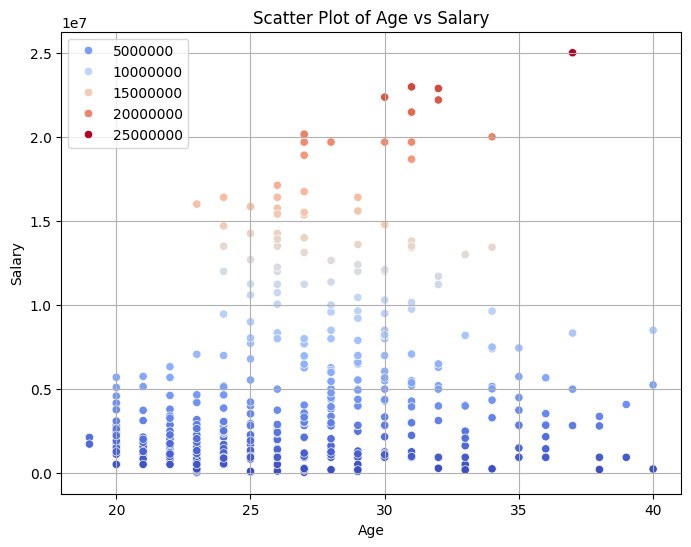

In [27]:
# visually plotting the correalation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Salary', palette='coolwarm')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

#Visually
#1. Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees. (2 marks)

Text(0.5, 1.0, ' Distribution of employees across each team and calculate the percentage')

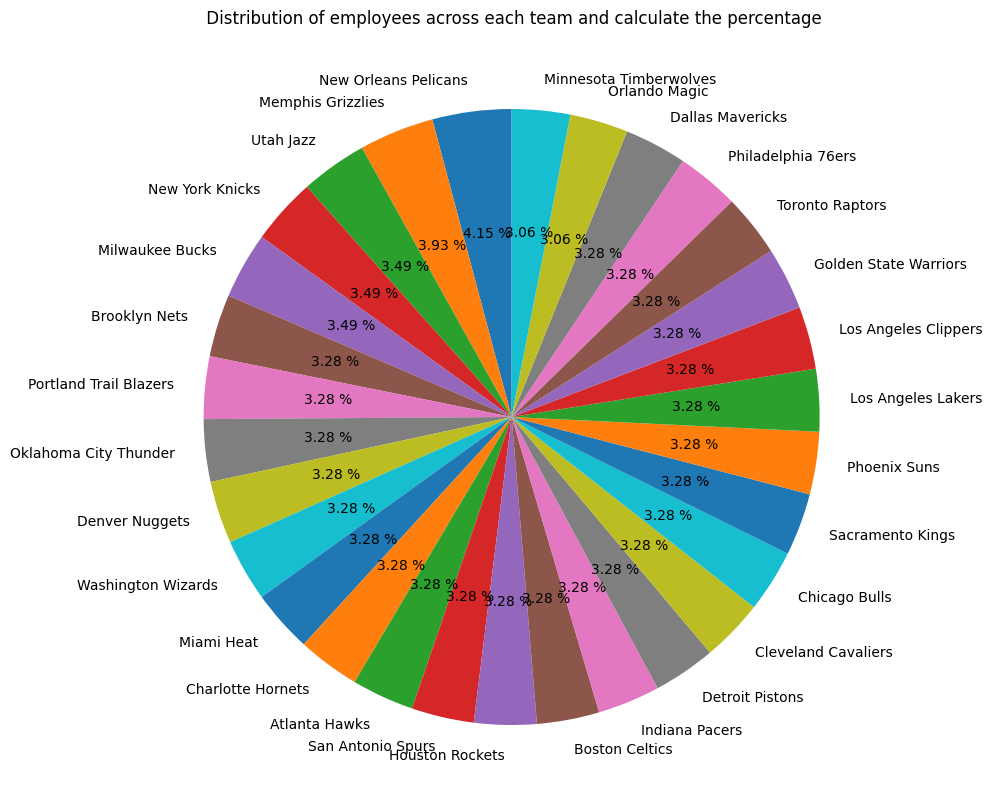

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


# pie chart is best for percentage typoe for better readbility so i choose it

y=percentage # data
labels=Team_types.index # labelimg
plt.figure(figsize=(15,10)) # to adjust the figure size
plt.pie(y,labels=labels,autopct="%.2f %%",startangle=90) # ploting the pie chart

plt.title(' Distribution of employees across each team and calculate the percentage') # title for the pir chart

#Data insights for  the distribution of employees across each team and the highest amount of employees are from the team New Oeleans Percelaeans and almost all workers are queally distributed and it is great for the edfiicency of the company

#2. Segregate employees based on their positions within the company

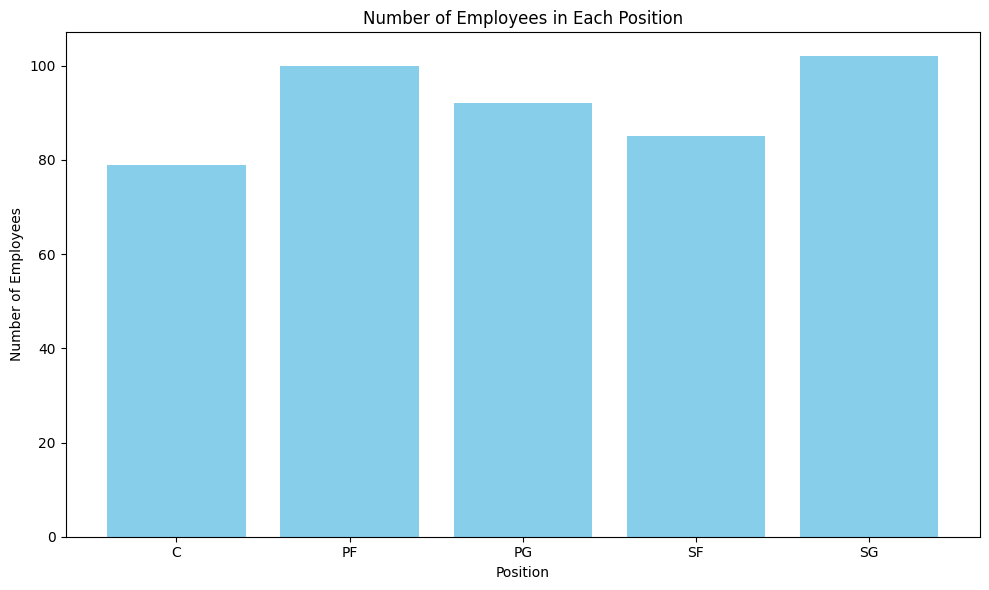

In [35]:
# Calculate the number of employees in each position
group['Employee_Count'] = group['Name'].apply(len)



# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size for better readability
plt.bar(group['Position'], group['Employee_Count'], color='skyblue')

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in Each Position')


# Show the plot
plt.tight_layout()  # Adjusts plot to fit nicely in the window
plt.show()

#Data insights for the number of workers in each positon
## Most workers is from the SG an dit will help them to work more effcently and eaasily hiring for c and SF is neccsary due to theri lack of workers their work there is a chance for inefficency in work and most of the workers in all other department is same

#3. Identify the predominant age group among employees.

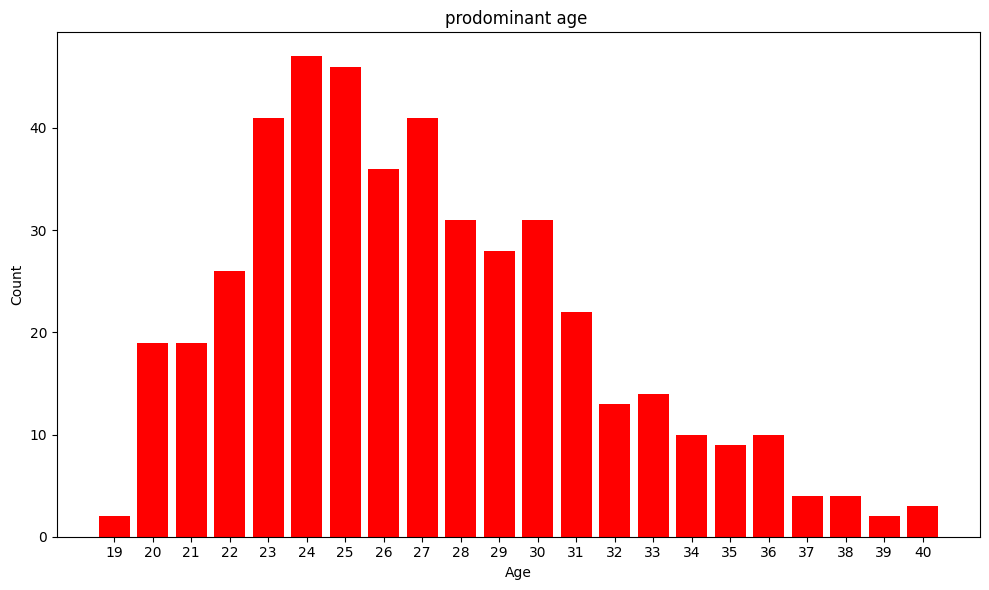

In [44]:
Age_count=df['Age'].value_counts().sort_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust the size for better readability
plt.bar(Age_count.index,Age_count.values ,color='r')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('prodominant age ')

plt.xticks(ticks=Age_count.index)


# Show the plot
plt.tight_layout()  # Adjusts plot to fit nicely in the window
plt.show()

#Data insights for age category in the company
##Most prodominant age is 24 its very great for the company's future due to the igniting miinds of the youth is the most in the workers and most of the woker is between 24 and 33 it is best the age group for the future of the company and there are no persons above the age 40

#4. Discover which team and position have the highest salary expenditure

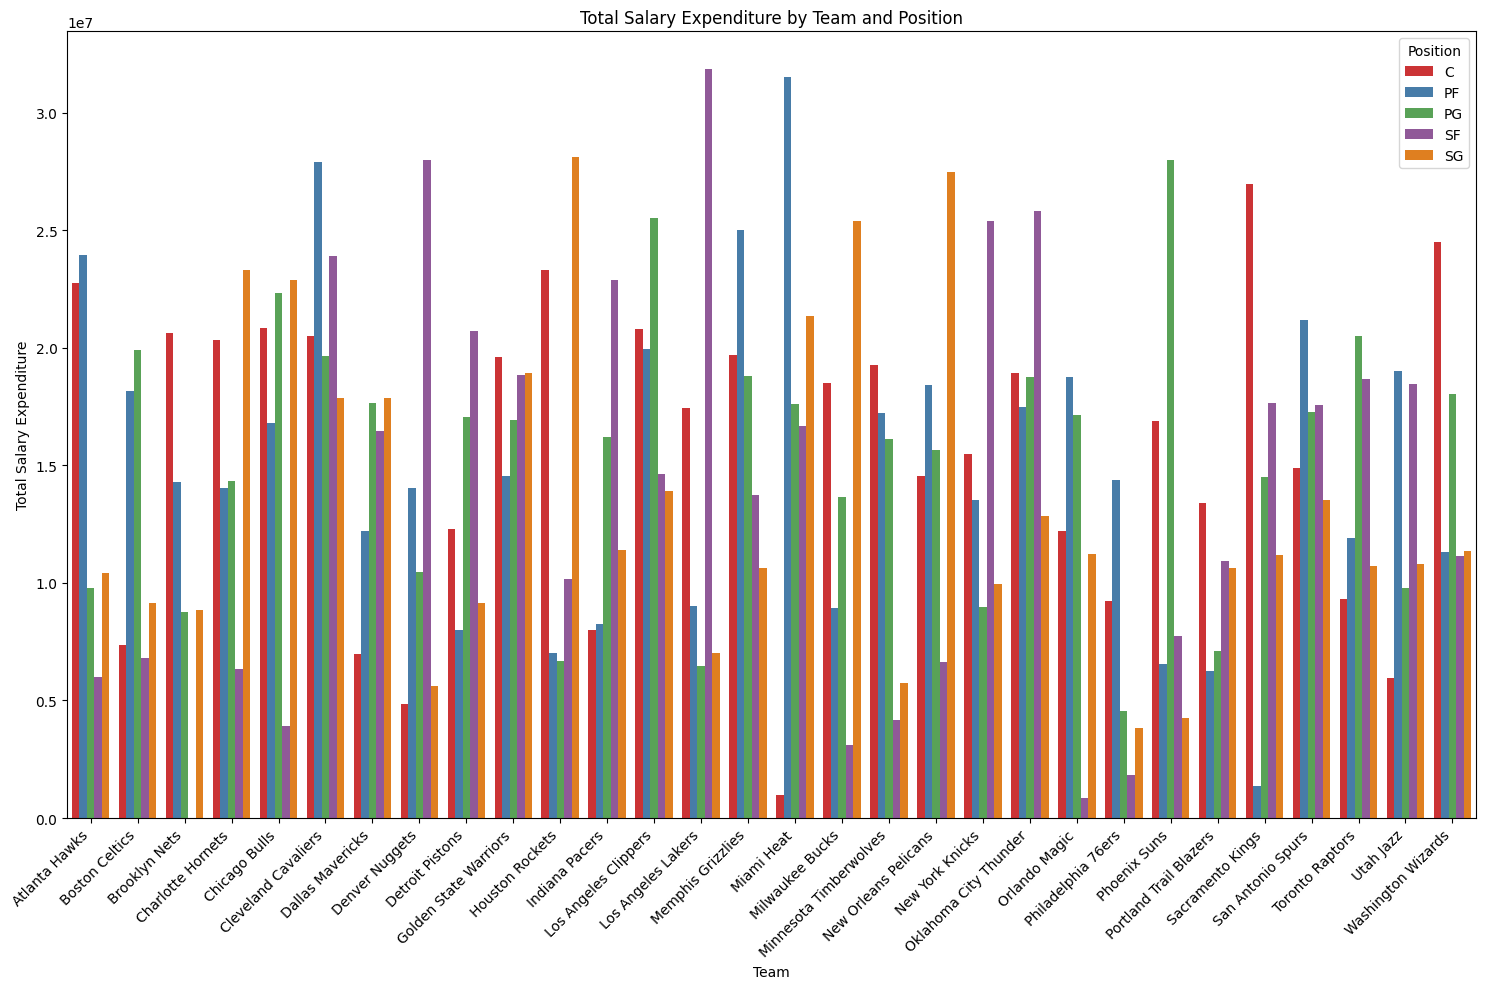

In [46]:
plt.figure(figsize=(14, 10))  # Adjust the figure size for better readability

# Plot a bar graph with seaborn
sns.barplot(x='Team', y='Salary', hue='Position', data=salary_per_team, palette='Set1')

# Adding labels and title
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.title('Total Salary Expenditure by Team and Position')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout to avoid label cut-off
plt.show()

#Data insights for above
## Team : Los Angeles Lakers - Position :SF :-highest salary expenditure  : 31866445.0 due top the higher earning they are spending too much money than all other team and position in the company

#5. Investigate if there's any correlation between age and salary, and represent it visually

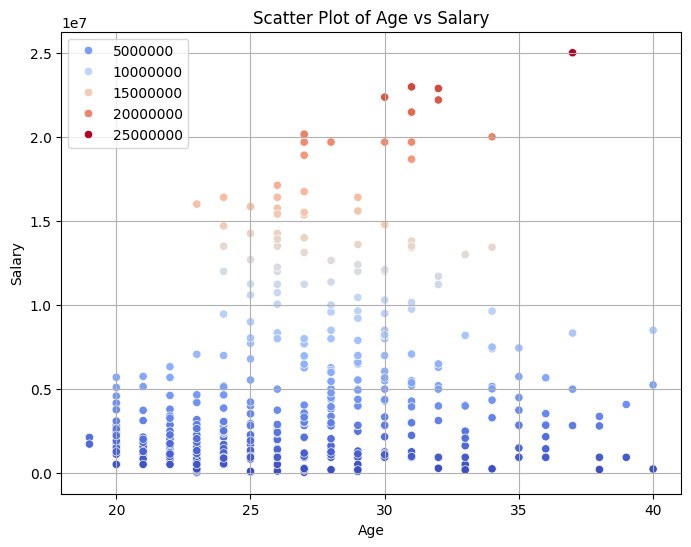

In [47]:
# visually plotting the correalation

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Salary', palette='coolwarm')
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()

#Data insight for the salary vs age correaltion
##most the high earning emloyees are from the 25 to 35 so high paying persons alla re youths it is best for work efficency and  fromlate 35 s are recieving low salaries due to the their lack of experiece and efficency and most payed worker is between from 35 and 40 due to their immense knowldenge and experience